In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import statistics
import nltk
import re
from scipy import stats
from venn import venn
import matplotlib
import squarify    
%matplotlib inline

In [3]:
recipes = pd.read_csv('data/large_data/recipes.csv')

In [39]:
full_ingredient_list = recipes['mod_ingredients'].apply(literal_eval).explode()
ingredient_freq = full_ingredient_list.value_counts()

In [6]:
search_phrase = input()

chicken soup


In [7]:
search_words = search_phrase.split(" ")
search_words = "|".join("^{}$".format(word) for word in search_words)

In [26]:
recipe_list = recipes.loc[recipes['name'].str.contains(search_phrase, case=False)].copy()

In [29]:
def calc_ingredient_ratings(ingredient_list, ingredient_freq= ingredient_freq):
    #print(ingredient_list) 
    rating = 0
    for ingredient in ingredient_list:
        try:
            freq = ingredient_freq.loc[ingredient]
        except:
            freq = 0
        rating += freq
    return rating

In [31]:
recipe_list['ingredient_score'] = recipe_list['mod_ingredients'].apply(calc_ingredient_ratings)

In [47]:
recipe_list['overall_score'] = stats.zscore(recipe_list['minutes']) + recipe_list['avg_rating'] + recipe_list['ingredient_score']*100 + stats.zscore(recipe_list['n_steps']) + stats.zscore(recipe_list['n_ingredients'])

In [48]:
def show_top_recipes(recipe_list):
    html = 'https://www.food.com/recipe/'
    common_ingredients = recipe_list['mod_ingredients'].apply(literal_eval).explode().value_counts()
    cmap = matplotlib.cm.Blues
    norm = matplotlib.colors.Normalize(vmin=min(common_ingredients), vmax=max(common_ingredients))
    colors = [cmap(norm(value)) for value in common_ingredients]
    squarify.plot(sizes=common_ingredients[:10], label=common_ingredients.index[:10], alpha=.5, text_kwargs={"wrap": True})
    plt.axis('off')
    plt.show()
    top_5 = recipe_list.nlargest(5, 'overall_score').copy()
    top_5['recipe_link'] = [f'https://www.food.com/recipe/{ing_id}' for ing_id in top_5['id']]
    return top_5[['name','id','overall_score','recipe_link']]

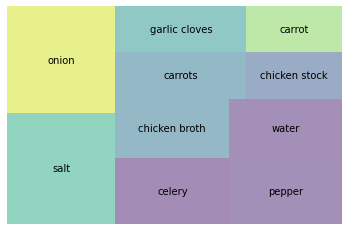

,name,id,overall_score,recipe_link
136918,mix match chicken soup,531169,12.944843,https://www.food.com/recipe/531169
64282,creole chicken soup,162876,10.568690,https://www.food.com/recipe/162876
45735,chicken soup for the crock pot,50914,10.211765,https://www.food.com/recipe/50914
141592,my doctor s mama s chicken soup,256307,10.129247,https://www.food.com/recipe/256307
146634,ohn no kauk swe burmese chicken soup,283434,9.496343,https://www.food.com/recipe/283434


In [49]:
show_top_recipes(recipe_list)

In [46]:
recipe_list.loc[61749]

name                          cream of chicken soup with wild rice ii
id                                                               3601
minutes                                                             0
contributor_id                                                   1555
submitted                                                  1999-09-24
tags                ['15-minutes-or-less', 'time-to-make', 'course...
nutrition                 [758.8, 70.0, 11.0, 54.0, 86.0, 89.0, 13.0]
n_steps                                                            25
steps               ['cook wild rice according to pkg', 'direction...
description                                                       NaN
ingredients         ['wild rice', 'broiler-fryer chickens', 'water...
n_ingredients                                                      14
mod_ingredients     ['wild rice', 'broiler-fryer chickens', 'water...
veg                                                             False
ratings             